In [179]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [180]:
df= pd.read_csv("data/dataset.csv")
df.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17740


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 658.5+ KB


In [182]:
#####Phân tích dữu liệu
# Ta thấy cột New_Price bị trống nhiều nên ta bỏ cột này đi 
df.drop(["New_Price"], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 611.4+ KB


In [183]:
# Ở cột mileage kiểm tra các giá trị còn thiếu
print(sum(df["Mileage"].isnull()))

2


In [184]:
# bỏ kí tự đơn vị của cột dữ liệu Mileage
mileage_df = df["Mileage"].str.split(" ", expand = True)
df["Mileage"] = pd.to_numeric(mileage_df[0], errors = 'coerce')
# lấy tổng trung bình của cột thay vào chô còn thiếu
df["Mileage"].fillna(df["Mileage"].astype("float64").mean(), inplace = True)
# kiểm tra lại
print(sum(df["Mileage"].isnull()))

0


In [185]:
#Các giá trị Engine có đơn vị CC vì vậy nên em xóa CC khỏi dữ liệu.
#Tương tự, Power có bhp, vì vậy em xóa bỏ . 
#Ngoài ra, vì có các giá trị bị thiếu trong Động cơ, Sức mạnh và Ghế ngồi, em thay thế chúng bằng giá trị trung bình.
cc_df = df["Engine"].str.split(" ", expand = True)
df["Engine"] = pd.to_numeric(cc_df[0], errors = 'coerce')
df["Engine"].fillna(df["Engine"].astype("float64").mean(), inplace = True)

bhp_df = df["Power"].str.split(" ", expand = True)
df["Power"] = pd.to_numeric(bhp_df[0], errors = 'coerce')
df["Power"].fillna(df["Power"].astype("float64").mean(), inplace = True)

df["Seats"].fillna(df["Seats"].astype("float64").mean(), inplace = True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  Price              6019 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 611.4+ KB


In [187]:
##Cột đầu tiên là index cho từng điểm dữ liệu và do đó chúng ta có thể loại bỏ nó.
df = df.iloc[:, 1:]
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1750
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12500
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4500
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17740


In [188]:
## Xem các loại xe khác nhau trong tập dữ liệu
df["Name"].value_counts()

Mahindra XUV500 W8 2WD                                49
Maruti Swift VDI                                      45
Maruti Swift Dzire VDI                                34
Honda City 1.5 S MT                                   34
Maruti Swift VDI BSIV                                 31
                                                      ..
Skoda Superb 1.8 TSI                                   1
Maruti Ignis 1.3 Zeta                                  1
Toyota Etios VD SP                                     1
Audi A6 2011-2015 2.0 TDI Technology                   1
Skoda Rapid 1.5 TDI AT Elegance Plus Black Package     1
Name: Name, Length: 1876, dtype: int64

In [189]:
#giá bán của 1 chiếc xe có phụ thuộc vào nhà sản xuất xe nên em sẽ trích xuất tên nhà SX từ cột này và thêm vào tập dữ liệu
make_df = df["Name"].str.split(" ", expand = True)
df["Manufacturer"] = make_df[0]
## vì ta có cột Manufacturuer nên ta xóa cột name đi để tránh trường hợp hiện tượng đa cộng biến dẫn đến sai lệch mô hình
df.drop("Name", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   float64
 10  Price              6019 non-null   int64  
 11  Manufacturer       6019 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 564.4+ KB


In [190]:
# Xét về năm thì chúng ta sẽ xét về tuổi của xe ảnh hưởng đến giá xe
curr_time = datetime.datetime.now()
df['Year'] = df['Year'].apply(lambda x : curr_time.year - x)

In [191]:
columnsTitles=["Year","Kilometers_Driven","Location","Fuel_Type","Transmission","Owner_Type","Mileage","Engine","Power","Seats","Manufacturer","Price"]
df=df.reindex(columns=columnsTitles)
df.head(5)

,Year,Kilometers_Driven,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer,Price
0,10,72000,Mumbai,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,1750
1,5,41000,Pune,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,12500
2,9,46000,Chennai,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,4500
3,8,87000,Chennai,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,6000
4,7,40670,Coimbatore,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,17740


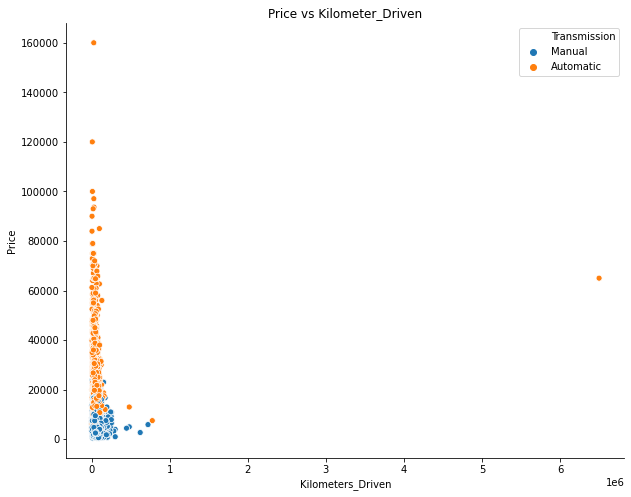

In [192]:
# hình 10x8
plt.figure(figsize = (10,8))
# vẽ các giá trị
sns.scatterplot(x = 'Kilometers_Driven', y = 'Price',  data = df, hue = df['Transmission'])
plt.title('Price vs Kilometer_Driven')
sns.despine() 

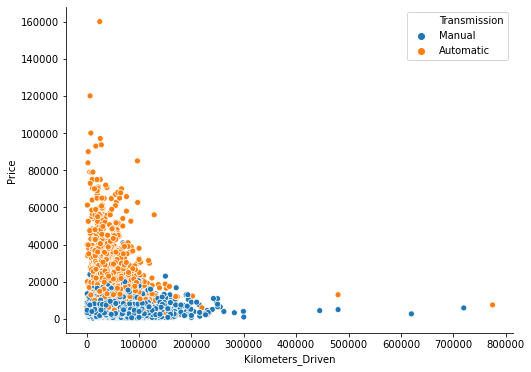

In [193]:
# Ta có thể thấy là xe đi càng ít thì giá càng cao và ở tập dữ liệu có điểm nhiễu  
#Nên em sẽ xóa cái điểm đấy đi
df = df[df['Kilometers_Driven'] < 6000000]
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Kilometers_Driven', y= 'Price', data = df, hue = df['Transmission'])
sns.despine()
plt.show()

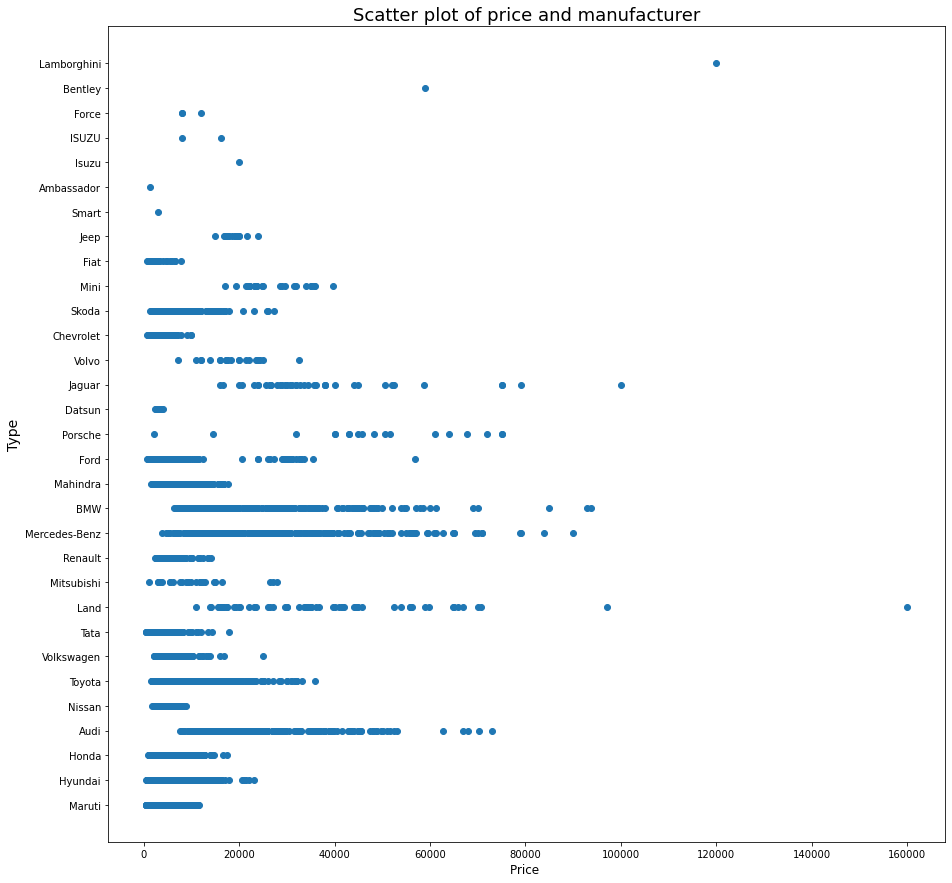

In [220]:

# hình 10x10
plt.figure(figsize=(15, 15))
# Ve các giá trị
plt.scatter(df.Price,df['Manufacturer'])
plt.xlabel("Price ", fontsize=12)
plt.ylabel("Type", fontsize=14)
plt.title("Scatter plot of price and manufacturer",fontsize=18)
plt.show()

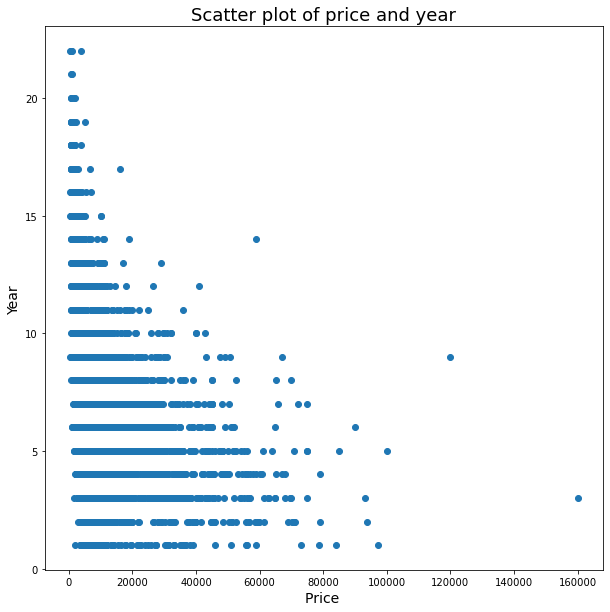

In [195]:
# Giá phân phối theo năm sản xuất
plt.figure(figsize=(10, 10))
plt.scatter(df.Price, df['Year'])
plt.xlabel("Price ", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.title("Scatter plot of price and year",fontsize=18)
plt.show()

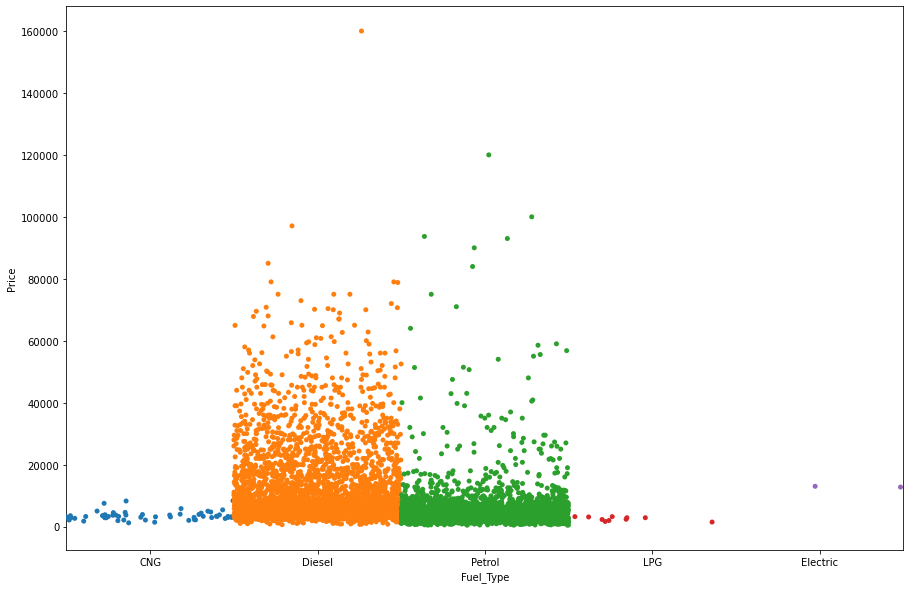

In [196]:
# Giá được phân phối trên các loại nhiên liệu
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='Fuel_Type', y='Price', jitter=.5)
plt.show()

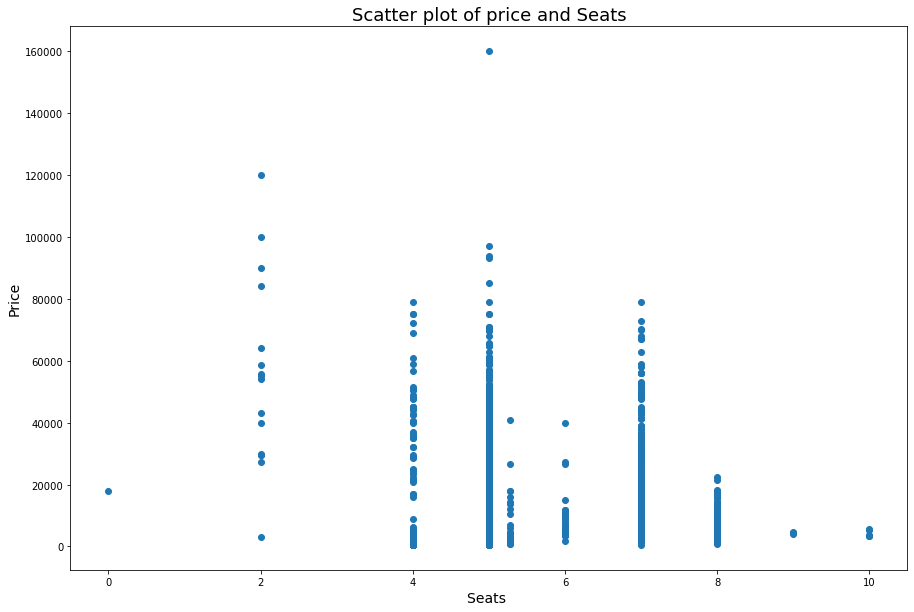

In [197]:
# Giá xe được phân phối trên số ghế
plt.figure(figsize=(15, 10))

plt.scatter(df.Seats,df.Price)
plt.xlabel("Seats ", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Scatter plot of price and Seats",fontsize=18)
plt.show()

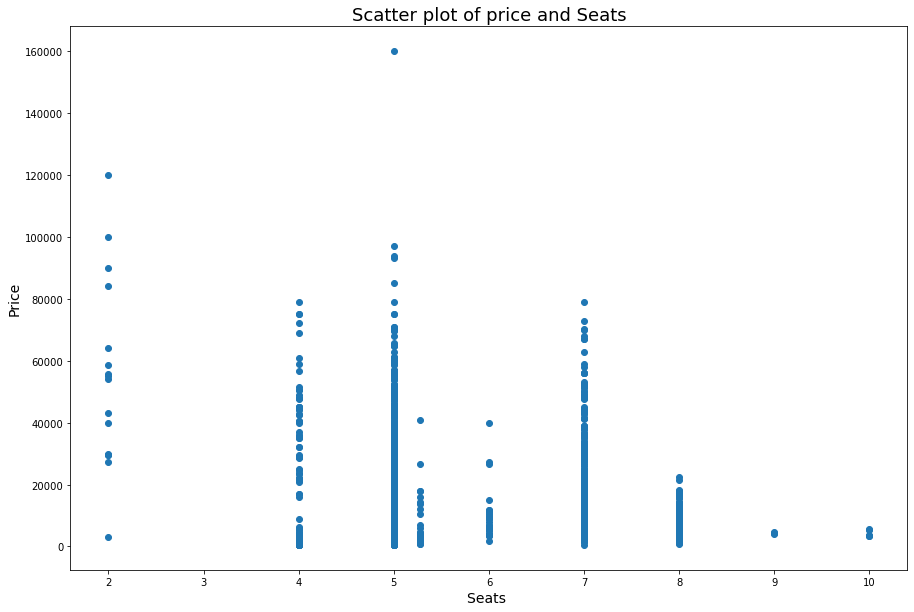

In [198]:
# Ở đây ta thấy có xe có số ghế là 0. điều này là vô lý nên ta sẽ bỏ cái điểm này đi!!! 
df = df[df['Seats'] > 0 ]
plt.figure(figsize=(15, 10))

plt.scatter(df.Seats,df.Price)
plt.xlabel("Seats ", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Scatter plot of price and Seats",fontsize=18)
plt.show()

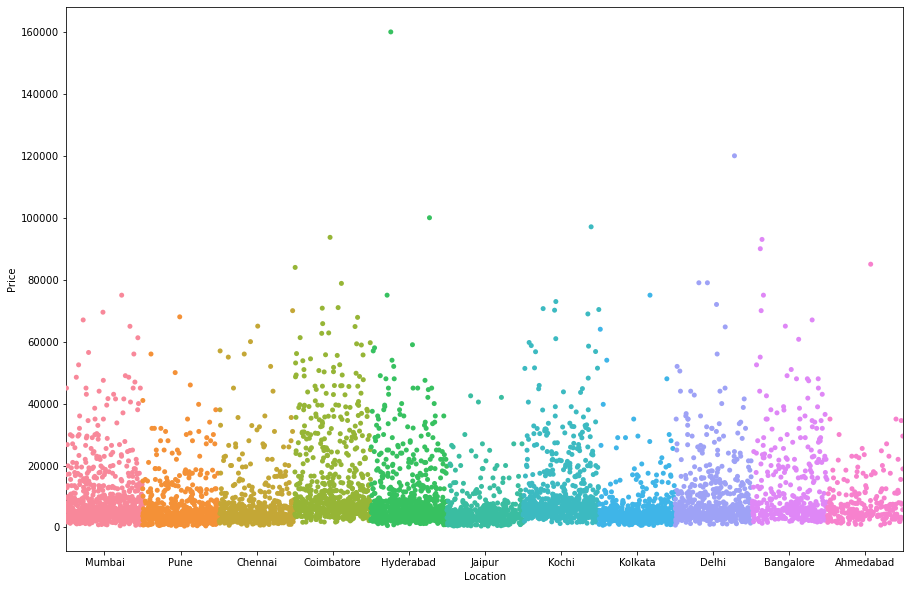

In [199]:
# Giá được phân phối trên vị trí bán xe
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='Location', y='Price', jitter=.5)
plt.show()

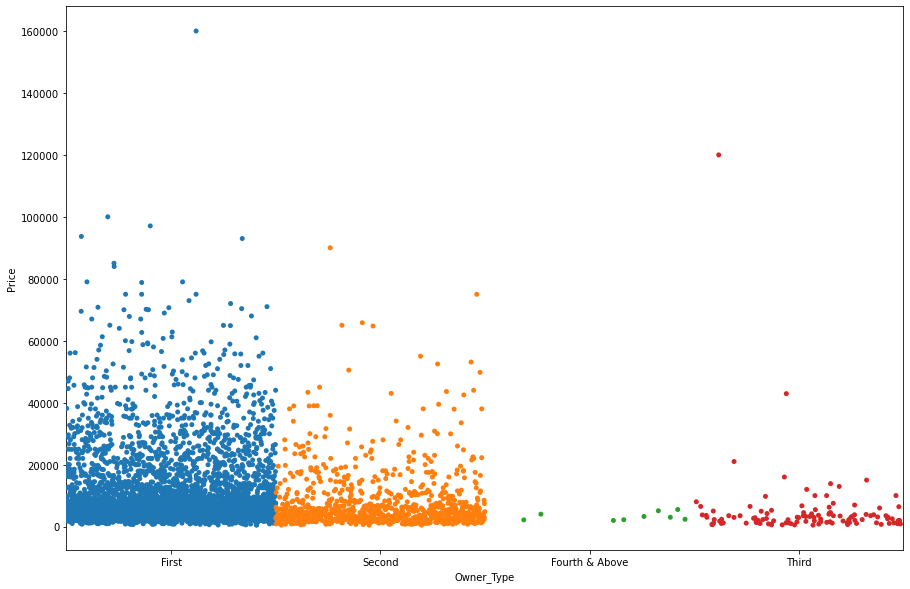

In [200]:
# Giá được phân phối trên Số lần sang tên
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='Owner_Type', y='Price', jitter=.5)
plt.show()

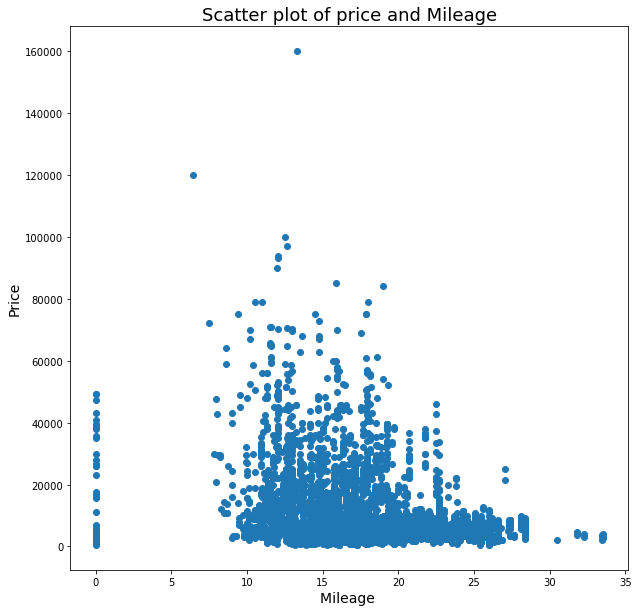

In [201]:
# Giá phân phối theo Mileage
plt.figure(figsize=(10, 10))
plt.scatter(df['Mileage'],df.Price)
plt.xlabel("Mileage ", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Scatter plot of price and Mileage",fontsize=18)
plt.show()

In [202]:
df_Mileage = df[df['Mileage'] == 0]
df_Mileage1 = df['Mileage']


In [203]:
#Tính trung bình cộng
def mean(df_Mileage1):
    return sum(df_Mileage1)/len(df_Mileage1)
mu = mean(df_Mileage1)


In [204]:
#Thay các giá trị 0 bằng giá trị trung bình
df['Mileage'].replace(0, mu,inplace=True)


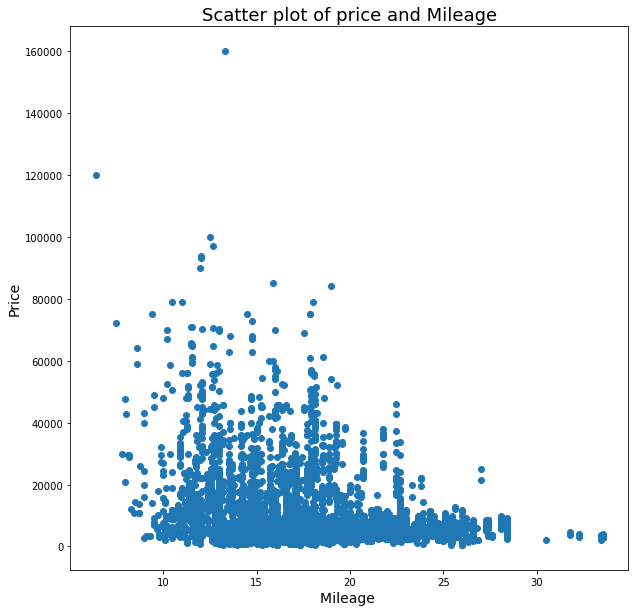

In [205]:
# Giá phân phối theo Mileage
plt.figure(figsize=(10, 10))
plt.scatter(df['Mileage'],df.Price)
plt.xlabel("Mileage ", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Scatter plot of price and Mileage",fontsize=18)
plt.show()

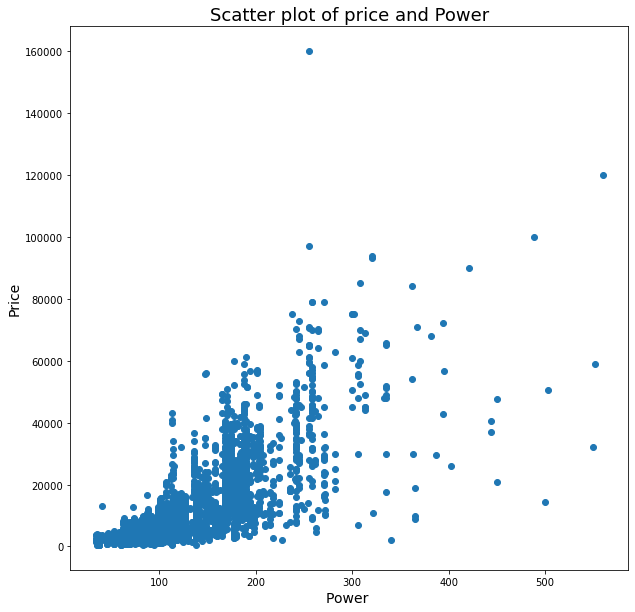

In [206]:
# Giá phân phối theo Power
plt.figure(figsize=(10, 10))
plt.scatter(df['Power'],df.Price)
plt.xlabel("Power ", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Scatter plot of price and Power",fontsize=18)
plt.show()

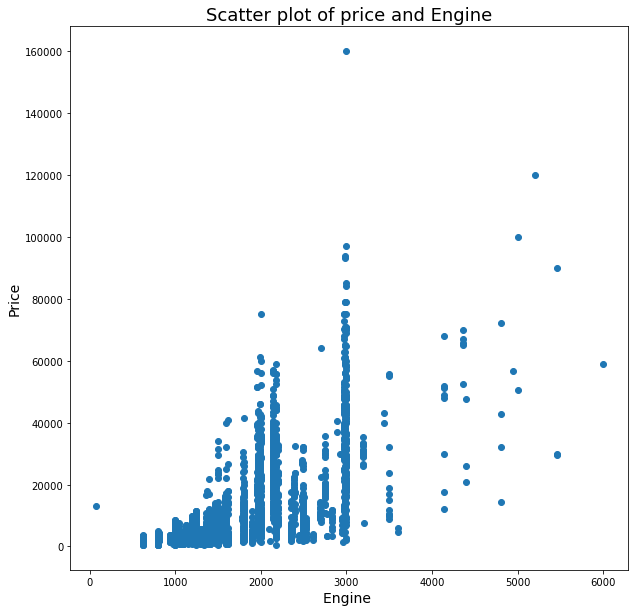

In [210]:
# Giá phân phối theo Engine
plt.figure(figsize=(10, 10))
plt.scatter(df['Engine'],df.Price)
plt.xlabel("Engine ", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Scatter plot of price and Engine",fontsize=18)
plt.show()

In [215]:
#sau khi xử lý xong ta sẽ sắp xếp và lưu file mới 
columnsTitles=["Manufacturer","Year","Kilometers_Driven","Location","Fuel_Type","Transmission","Owner_Type","Mileage","Engine","Power","Seats","Price"]
df=df.reindex(columns=columnsTitles)

In [216]:
df.to_csv("data/finaldataset.csv")

In [217]:
df= pd.read_csv("data/finaldataset.csv")

In [218]:
df.head(5)

,Unnamed: 0,Manufacturer,Year,Kilometers_Driven,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti,10,72000,Mumbai,CNG,Manual,First,26.60,998.0,58.16,5.0,1750
1,1,Hyundai,5,41000,Pune,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12500
2,2,Honda,9,46000,Chennai,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4500
3,3,Maruti,8,87000,Chennai,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6000
4,4,Audi,7,40670,Coimbatore,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17740
